In [36]:
# import libraries
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt
import math


## Problem 3

In a sample of 100 steel wires the average breaking strength is 50 kN, with a standard
deviation of 2 kN.  
(a) Find a 95% confidence interval for the mean breaking strength of this type of wire.  
(b) Find a 99% confidence interval for the mean breaking strength of this type of wire.  
(c) An engineer claims that the mean breaking strength is between 49.7 kN and 50.3 kN. With what level of confidence can this statement be made?  
(d) How many wires must be sampled so that a 95% confidence interval specifies the mean breaking strength to within ±0.3 kN?  
(e) How many wires must be sampled so that a 99% confidence interval specifies the mean breaking strength to within ±0.3 kN?  

In [75]:
# Establish known variables
mu = 50
std_dev = 2
N = 100 

In [76]:
# A 
# Calculate a confidence interval of 95%. This is done by determining rho and subtracting and adding it to mu.

conf_level = 0.95
rho = (std_dev/np.sqrt(N))*abs(stats.norm().ppf((1-conf_level)/2))

range = [mu-rho, mu+rho]
range

[49.60800720309199, 50.39199279690801]

In [77]:
# B 
# Calculate a confidence interval of 99%. This is done by determining rho and subtracting and adding it to mu.

gamma = 0.99
rho = (std_dev/np.sqrt(N))*abs(stats.norm().ppf((1-conf_level)/2))

range = [mu-rho, mu+rho]
range

[49.60800720309199, 50.39199279690801]

In [78]:
# C 
# Determine the confidence interval for the breaking strenght between 49.7 and 50.3. This is done by creating a normal 
#distribution centered around mu with the standard deviation and number of samples.  
# Then subtracting the cdfs at the two ends
Y = stats.norm(loc=mu, scale = std_dev/np.sqrt(N))
conf_level = Y.cdf(50.3) - Y.cdf(49.7)
conf_level

0.8663855974622803

In [80]:
# D 
# given rho, confidence level, mu, and standard deviation the number of samples can be determined
# and must be rounded up as it should be a whole number.

rho = 0.3
conf_level= 0.95
N = math.ceil(((std_dev/rho)*abs(stats.norm().ppf((1-conf_level)/2)))**2)
N

171

In [82]:
# E 
# given rho, confidence level, mu, and standard deviation the number of samples can be determined and 
# must be rounded up as it should be a whole number.

rho = 0.3
conf_level = 0.99
N = math.ceil(((std_dev/rho)*abs(stats.norm().ppf((1-conf_level)/2)))**2)
N

295

## Problem 4

A chemist made eight independent measurements of the melting point of tungsten. She
obtained a sample mean of 3410.14 degrees Celsius and a sample standard deviation of 1.018
degrees.  
(a) Use the Student’s t distribution to find a 95% confidence interval for the melting point of tungsten.  
(b) Use the Student’s t distribution to find a 98% confidence interval for the melting point of tungsten.  

In [56]:
# Known Variables
N = 8
mu = 3410.14
std_dev = 1.018

In [59]:
# A
# Determine the confidence interval at a confidence level of 95%
conf_level = 0.95
rho = (std_dev/np.sqrt(N))*abs(stats.t(df=N-1).ppf((1-conf_level)/2))
conf_interval = [mu-rho, mu+rho]
conf_interval

[3409.2889307019905, 3410.9910692980093]

In [60]:
# B
# Determine the confidence interval at a confidence level of 98%
conf_level = 0.98
rho = (std_dev/np.sqrt(N))*abs(stats.t(df=N-1).ppf((1-conf_level)/2))
conf_interval = [mu-rho, mu+rho]
conf_interval

[3409.0609852117555, 3411.2190147882443]

## Problem 5

A producer of printed circuit boards (PCBs) wishes to estimate the scoring depth of their
circuits. To this end, they have collected 45 samples of measured depths. The mean and
standard deviations of these samples is 0.165 mm and 0.022 mm respectively.  
(a) Find a 95% confidence interval for the true score depth.  
(b) Create a plot showing the dependence of the size of the confidence interval (ρ) on the confidence level (γ) ranging from 0 to 1. Keep the sample size fixed at 45.  
(c) Create a plot showing the dependence of the size of the confidence interval on the sample size ranging from 1 to 100. Keep the confidence level fixed at 0.95. (Here you can assume normality even where N <30).  
(d) Create a plot showing the pdf of the sample mean and with the area computed in part d) shaded in. Hint: plt.fill between.  


In [61]:
# known variables
N = 45
mu = 0.165
std_dev = 0.022

In [62]:
# A
# Find confidence interval for a confidence level of 95%
conf_level = 0.95
rho = (std_dev/np.sqrt(N))*abs(stats.t(df=N-1).ppf((1-conf_level)/2))
conf_interval = [mu-rho, mu+rho]
conf_interval

[0.15839046830057163, 0.17160953169942839]

Text(0, 0.5, 'Rho')

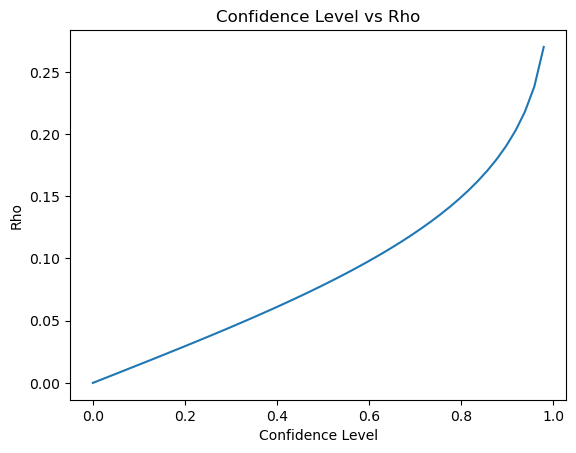

In [83]:
# B 
# Create a plot of the confidence level vs rho with a fixed sample size of 45
conf_level = np.linspace(0,1)
rho = (std_dev/np.sqrt(N))*abs(stats.norm().ppf((1-conf_level)/2))

plt.plot(conf_level,rho)
plt.title('Confidence Level vs Rho')
plt.xlabel('Confidence Level')
plt.ylabel('Rho')

Text(0, 0.5, 'Rho')

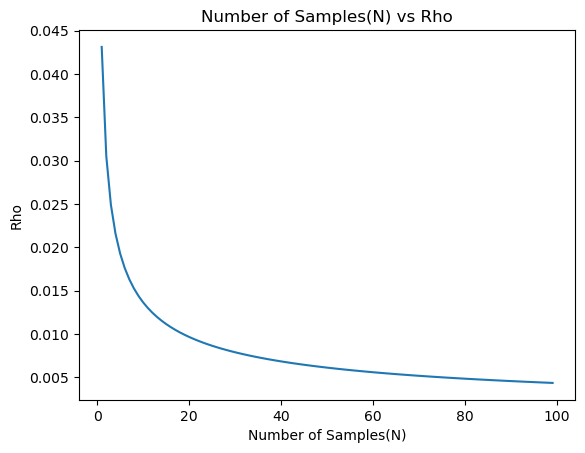

In [64]:
# C
# Create a plot of the number of samples vs rho at a fixed confidence level of 95%. Assume normality
conf_level = 0.95 
N = np.arange(1,100)
rho = (std_dev/np.sqrt(N))*abs(stats.norm().ppf((1-conf_level)/2))

plt.plot(N,rho)
plt.title('Number of Samples(N) vs Rho')
plt.xlabel('Number of Samples(N)')
plt.ylabel('Rho')

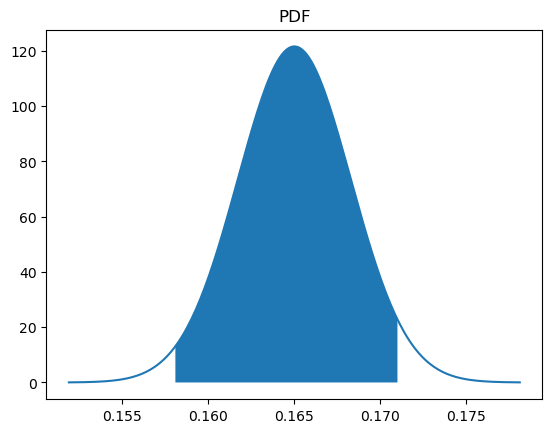

In [74]:
# D
# Create a pdf plot
N = 45
Yn = stats.norm(loc = mu, scale = std_dev/np.sqrt(N))
y = np.linspace(mu-4*std_dev/np.sqrt(N), mu+4*std_dev/np.sqrt(N),200)

plt.plot(y, Yn.pdf(y))
plt.title('PDF')
yint = y[(y>=0.158) & (y<=0.171)]
plt.fill_between(yint,Yn.pdf(yint))

## Problem 6
The Occupational Safety and Health Administration (OSHA) establishes Permissible Exposure Limits (PELs) for nitrous oxide of 50 ppm. Measurements from a chemical plant yielded 
the following ppm values for nitrous oxide: {48,42,58,45,51,39,45,58,43,50,43,43} You can assume that the true distribution is Gaussian.  
(a) State the null and alternative hypotheses for a test meant to show that the plant violates the standard.  
(b) Which statistic is appropriate for this test and what is its distribution?  
(c) Compute the p-value for the test statistic.  
(d) Can we conclude to a 5% significance level that the plant violates the standard?  

### A
h0 = 50  
h1 > 50

In [28]:
# B 
y = np.array([48,42,58,45,51,39,45,58,43,50,43,43])
N = y.shape[0]
mu = y.mean()
std_dev = y.std(ddof=1)
Yn = stats.norm(loc = mu, scale = std_dev/np.sqrt(N))
y = np.linspace(mu-4*std_dev/np.sqrt(N), mu+4*std_dev/np.sqrt(N),200)

plt.plot(y, Yn.pdf(y))
plt.title('PDF')
yint = y[(y>=0.158) & (y<=0.171)]
plt.fill_between(yint,Yn.pdf(yint))

In [29]:
# C
y = np.array([48,42,58,45,51,39,45,58,43,50,43,43])
N = y.shape[0]
mu = y.mean()
std_dev = y.std(ddof=1)
t = (mu-50)/(std_dev/np.sqrt(N))
t

-1.6490831626990412

In [30]:
1-stats.t(df=N-1).cdf(t)

0.9363166928058132

In [31]:
# P value is greater than sigma so we fail to reject h0

## Problem 7

Note Watch the mini-lecture on ‘Confidence intervals for Bernoulli processes’, and then
answer this question.  

Stainless steels can be susceptible to stress corrosion cracking under certain conditions. A
materials engineer is interested in determining the proportion of steel alloy failures that are
due to stress corrosion cracking.  
(a) In the absence of preliminary data, how large a sample must be taken so as to be sure
that a 98% confidence interval will specify the proportion to within ±0.05?  
(b) In a sample of 200 failures, 30 of them were caused by stress corrosion cracking. Find a
98% confidence interval for the proportion of failures causedby stress corrosion cracking.  
(c) Based on the data in part (b), estimate the sample size needed so that the 98% confidence interval will specify the proportion to within ±0.05.  

In [ ]:
# A


In [34]:
# B

N = 200
p = 30/200
std_dev = np.sqrt(p*(1-p))
gamma = 0.98
rho = (std_dev/np.sqrt(N))*abs(stats.norm.ppf((1-gamma)/2))
rho

0.05873740460555898

In [35]:
# C 
gamma = 0.98
rho = 0.05
p = 30/200
p*(1-p)*(stats.norm.ppf((1-gamma)/2)/rho)**2

276.00661598377127